In [43]:
import pandas as pd
import numpy as np
import seaborn as sns # sam seaborn
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/house_data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
data.corr()['SalePrice'].sort_values(ascending=False).head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

<AxesSubplot:>

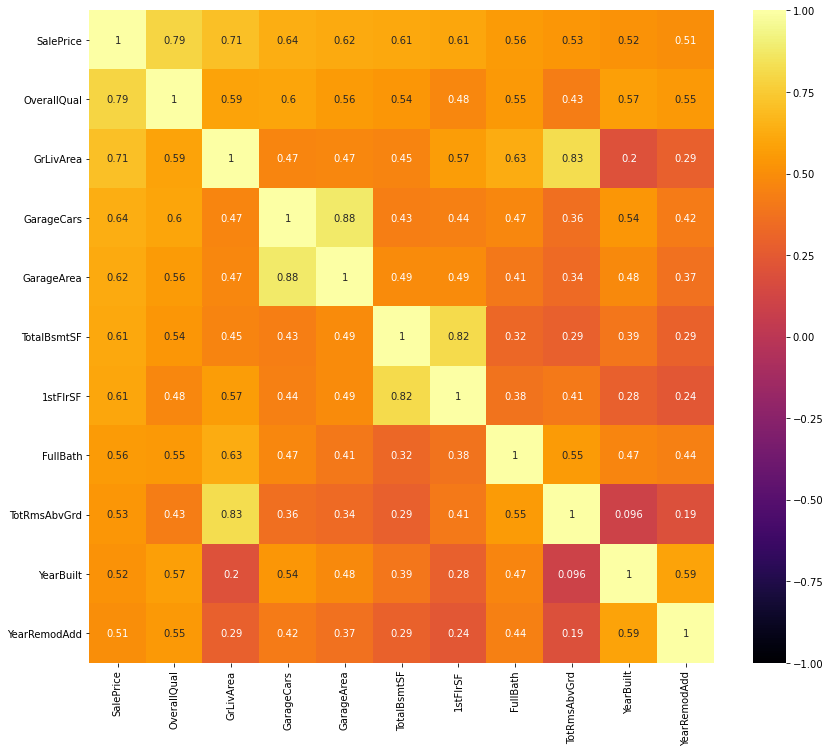

In [45]:
cols = data.corr()['SalePrice'].sort_values(ascending=False).head(11).index
top_10 = data.corr().loc[cols, cols]

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(top_10, vmin=-1, vmax=1, annot=True, cmap='inferno')

In [46]:
cols_list = list(cols)
print(cols_list)

for col in ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd']:
    cols_list.remove(col)
print(cols_list)
    

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']


In [47]:
data_filtered = data[cols_list]
data_filtered.shape

(1460, 8)

In [48]:
data_filtered.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,208500,7,1710,2,856,2,2003,2003
1,181500,6,1262,2,1262,2,1976,1976
2,223500,7,1786,2,920,2,2001,2002
3,140000,7,1717,3,756,1,1915,1970
4,250000,8,2198,3,1145,2,2000,2000


In [49]:
data_filtered.isna().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [50]:
data_filtered = data_filtered.dropna()

In [51]:
data_filtered.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [52]:
y = data_filtered['SalePrice']

In [53]:
data_filtered[data_filtered.columns[1:]]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,7,1710,2,856,2,2003,2003
1,6,1262,2,1262,2,1976,1976
2,7,1786,2,920,2,2001,2002
3,7,1717,3,756,1,1915,1970
4,8,2198,3,1145,2,2000,2000
...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,2000
1456,6,2073,2,1542,2,1978,1988
1457,7,2340,1,1152,2,1941,2006
1458,5,1078,1,1078,1,1950,1996


In [54]:
data_filtered.iloc[:, 1:]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,7,1710,2,856,2,2003,2003
1,6,1262,2,1262,2,1976,1976
2,7,1786,2,920,2,2001,2002
3,7,1717,3,756,1,1915,1970
4,8,2198,3,1145,2,2000,2000
...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,2000
1456,6,2073,2,1542,2,1978,1988
1457,7,2340,1,1152,2,1941,2006
1458,5,1078,1,1078,1,1950,1996


In [55]:
X = data_filtered.loc[:, "OverallQual":]

In [56]:
print(y.shape, X.shape)

(1460,) (1460, 7)


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(978, 7) (978,)
(482, 7) (482,)


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
356,6,1167,2,1158,2,1992,1992
1359,9,1980,3,1980,2,2004,2005
294,6,1644,2,1416,1,1953,1953
1145,5,1576,1,1042,1,1928,1950
1388,9,1746,3,1746,2,2006,2007


In [60]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression() # camel case -> название классов
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [70]:
model.fit(X_train, y_train) # fit - обучение

LinearRegression()

In [76]:
print(model.coef_)

[21440.78706608    45.4532126  15873.32543733    24.64441931
 -1817.75132612   180.75984616   271.15832501]


In [77]:
print(X_train.columns)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')


In [86]:
# проверяем качество на тренировочной выборке
train_pred = model.predict(X_train)

In [87]:
train_pred[:10]

array([173021.9729449 , 316123.01047478, 185254.35818605, 130299.94327438,
       300624.00095061,  94251.237572  ,  46599.61970863, 151813.24232182,
       220885.36592098,  90110.57476929])

In [88]:
y_train[:10]

356     173000
1359    315000
294     167000
1145    149000
1388    377500
562     108000
1337     52500
986     117000
67      226000
268     120500
Name: SalePrice, dtype: int64

In [89]:
import numpy as np
sum(np.abs((y_train - train_pred))) / len(y_train)

23925.637817484054

In [90]:
from sklearn.metrics import mean_absolute_error

In [92]:
print("Ошибка на тренировочной выборке")
mean_absolute_error(y_train, train_pred)

Ошибка на тренировочной выборке


23925.63781748405

In [94]:
test_pred = model.predict(X_test)
print("Ошибка на тестовой выборке")
mean_absolute_error(test_pred, y_test)

Ошибка на тестовой выборке


25547.544331833782

In [101]:
from sklearn.neighbors import KNeighborsRegressor

# [1, 5, 10, 20]
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
print("Количество соседей: 5")
print("Ошибка на тренировочной выборке")
train_pred = model.predict(X_train)
print(mean_absolute_error(y_train, train_pred))

print("Ошибка на тестовой выборке")
test_pred = model.predict(X_test)
print(mean_absolute_error(test_pred, y_test))

Количество соседей: 5
Ошибка на тренировочной выборке
22815.321063394684
Ошибка на тестовой выборке
27108.011203319504


In [104]:
for i in [1, 5, 10, 15, 20]:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    print(f"Количество соседей: {i}")

    print("Ошибка на трен выборке")
    train_pred = model.predict(X_train)
    print(mean_absolute_error(y_train, train_pred))

    print("Ошибка на тест выборке")
    test_pred = model.predict(X_test)
    print(mean_absolute_error(test_pred, y_test))
    print('-'*20)

Количество соседей: 1
Ошибка на трен выборке
163.63292433537833
Ошибка на тест выборке
32501.053941908714
--------------------
Количество соседей: 5
Ошибка на трен выборке
22815.321063394684
Ошибка на тест выборке
27108.011203319504
--------------------
Количество соседей: 10
Ошибка на трен выборке
24538.061145194275
Ошибка на тест выборке
27436.664730290457
--------------------
Количество соседей: 15
Ошибка на трен выборке
25473.020858895703
Ошибка на тест выборке
27982.64993084371
--------------------
Количество соседей: 20
Ошибка на трен выборке
26319.949335378325
Ошибка на тест выборке
28524.395435684648
--------------------
